<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

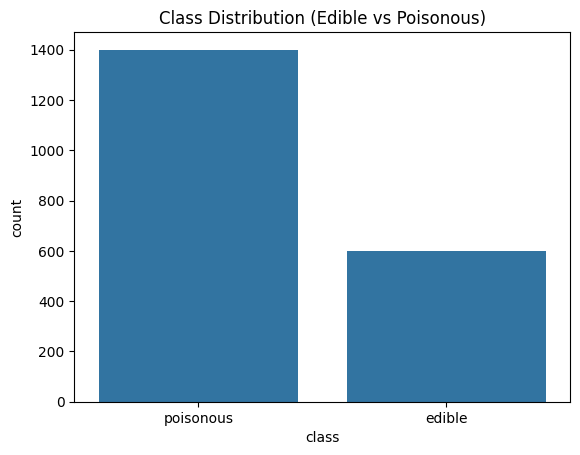


Missing Values:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [ ]:
# Load Mushroom dataset
df = pd.read_csv("mushroom.csv")

# Basic info
print(df.info())
print(df.head())

# Class distribution
sns.countplot(data=df, x='class')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


In [ ]:
# Encode categorical features using LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Features and Target
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


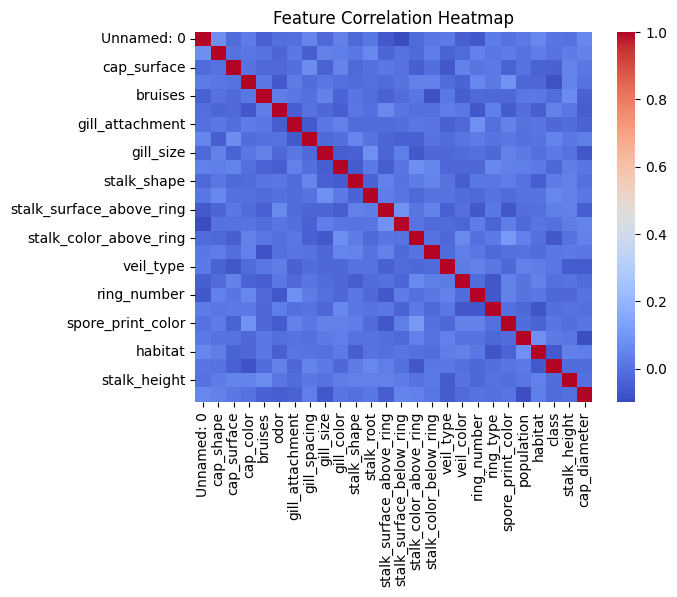

In [ ]:
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
svm_model = SVC(kernel='rbf')  # You can change to 'linear' or 'poly'
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.38      0.54       133
           1       0.76      0.99      0.86       267

    accuracy                           0.79       400
   macro avg       0.86      0.68      0.70       400
weighted avg       0.83      0.79      0.75       400



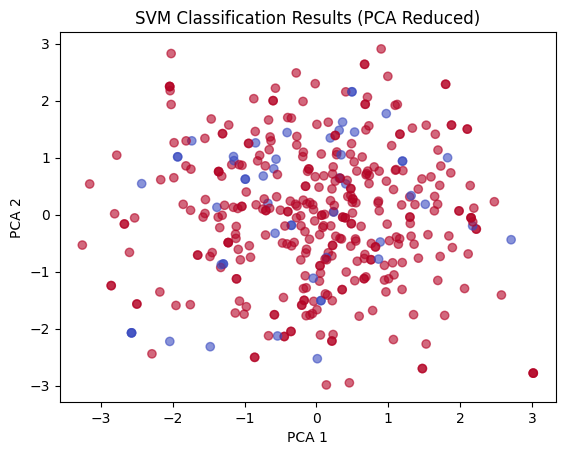

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.title("SVM Classification Results (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

grid = GridSearchCV(SVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.8512500000000001


In [ ]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{kernel.capitalize()} Kernel Accuracy: {acc:.4f}")


Linear Kernel Accuracy: 0.6675
Poly Kernel Accuracy: 0.8300
Rbf Kernel Accuracy: 0.7875


Linear Kernel performs well on linearly separable data but may underfit non-linear data.

RBF Kernel generally performs best for complex, non-linear datasets.

Polynomial Kernel can overfit if degree is high but sometimes useful for specific interactions.